In [381]:
#importing libraries and file
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

mkt = pd.read_csv(r"C:\Users\pedro\Desktop\Ironhack\lab-cleaning-numerical-data\files_for_lab\we_fn_use_c_marketing_customer_value_analysis.csv")

In [382]:
#function standardizing headers
def standardize_headers(df):
    cols = []
    for i in range(len(df.columns)):
        cols.append(df.columns[i].lower().replace(' ','_'))
    df.columns = cols
    return df

mkt=standardize_headers(mkt)

In [383]:
#identifying numerical data
mkt.select_dtypes(include=[np.number]).dtypes

customer_lifetime_value          float64
income                             int64
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
total_claim_amount               float64
dtype: object

# removing outliers

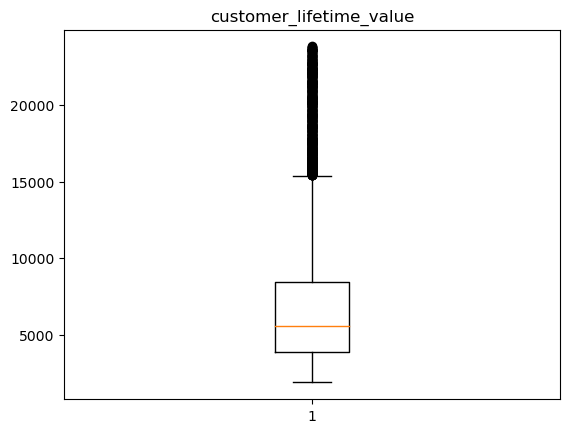

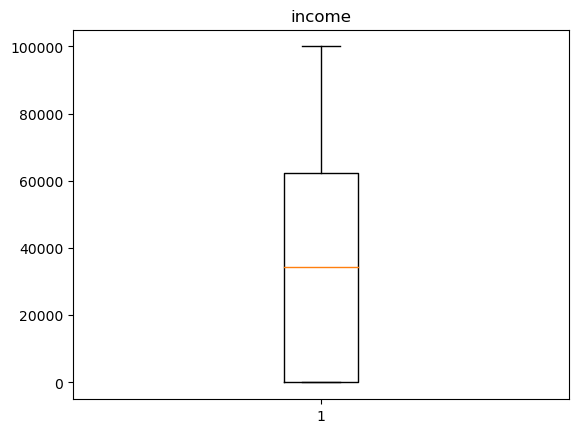

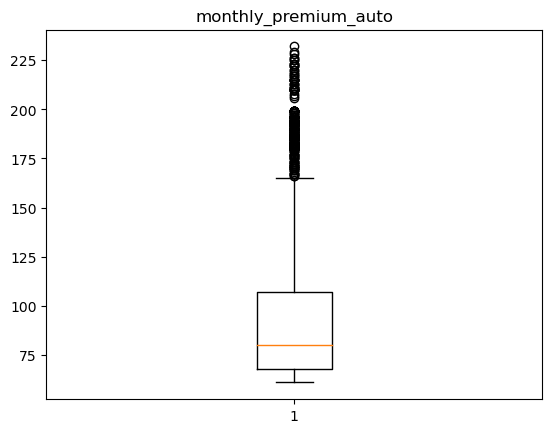

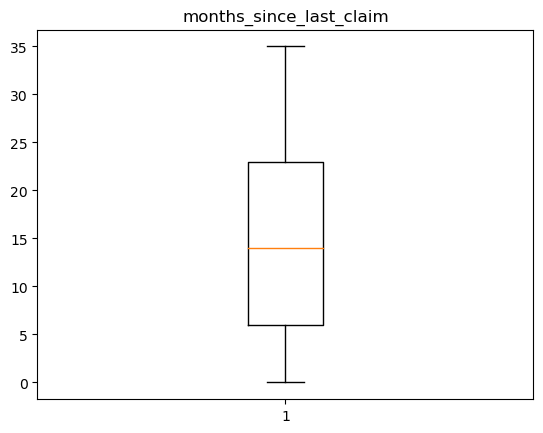

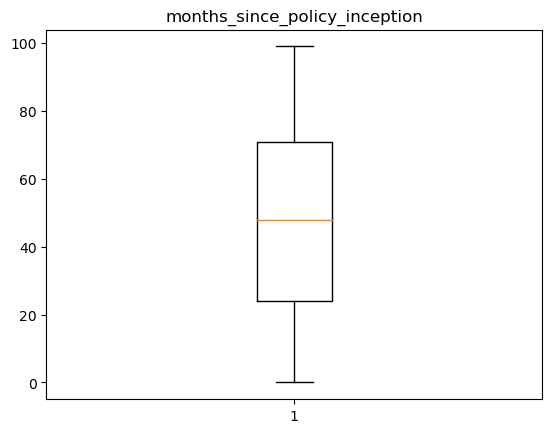

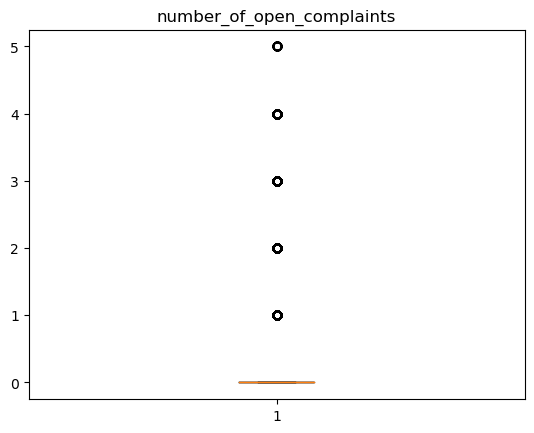

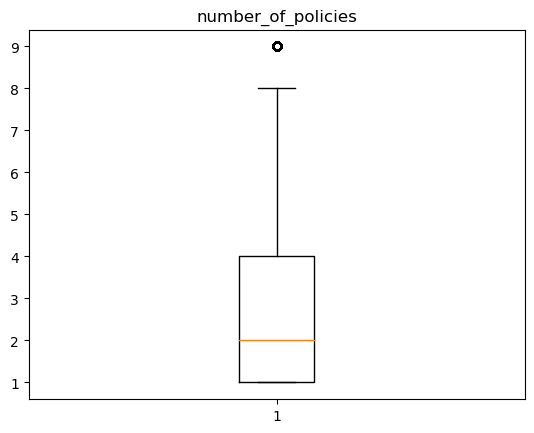

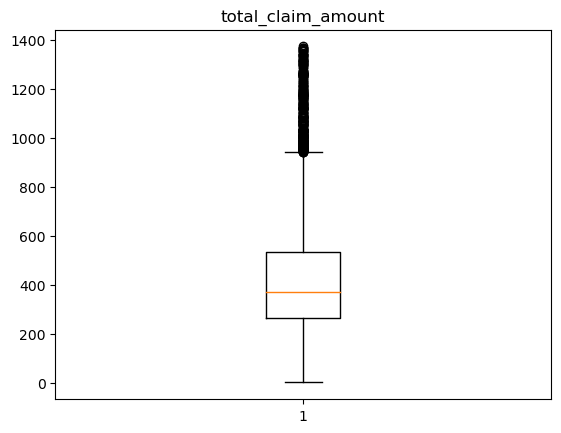

In [384]:
#Looking for outliers in the continuous variables by plotting boxplots
def boxplot_df(df):
    for i in range(len(df.columns)):
        plt.boxplot(df.iloc[:,[i]])
        plt.title(list(df.columns.values)[i])
        i=i+1
        plt.show()  
        
boxplot_df(mkt_numerical)

In [385]:
#function to indentify outliers
def find_outliers_IQR(df,columns):
    outliers = []
    for column_name in columns:
        q1=df[column_name].quantile(0.25)
        q3=df[column_name].quantile(0.75)
        IQR=q3-q1
        outliers.extend(df[(df[column_name] < (q1-1.5*IQR)) | (df[column_name] > (q3+1.5*IQR))].index)
    outliers=sorted(set(outliers))
    return df[df.index.isin(outliers)]


#function to indentify extreme outliers
def find_extreme_outliers_IQR(df,columns):
    outliers = []
    for column_name in columns:
        q1=df[column_name].quantile(0.25)
        q3=df[column_name].quantile(0.75)
        IQR=q3-q1
        outliers.extend(df[(df[column_name] < (q1-3*IQR)) | (df[column_name] > (q3+3*IQR))].index)
    outliers=sorted(set(outliers))
    return df[df.index.isin(outliers)]

In [386]:
#function to drop outliers
def drop_extreme_outliers_IQR(df,columns):
    return df.drop(find_extreme_outliers_IQR(df,columns).index)

#function to drop extreme outliers
def drop_extreme_outliers_IQR(df,columns):
    return df.drop(find_extreme_outliers_IQR(df,columns).index)

#dropping extreme outliers
mkt=drop_extreme_outliers_IQR(mkt,['total_claim_amount','customer_lifetime_value','number_of_policies','monthly_premium_auto'])
print("Dataframe shape after outlier remotion:",mkt.shape)

Dataframe shape after outlier remotion: (8621, 24)


# copy the dataframe for the data wranglilng

In [387]:
#creating a copy for data wrangling
mkt_data=mkt

# normalizing continuous variables

In [388]:
#identifying numerical data
mkt_data.select_dtypes(include=[np.number]).dtypes

customer_lifetime_value          float64
income                             int64
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
total_claim_amount               float64
dtype: object

In [389]:
#normalizing continuous variables
continuous_variables=['customer_lifetime_value','income','monthly_premium_auto','total_claim_amount']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
mkt_data[continuous_variables] = scaler.fit_transform(mkt_data[continuous_variables])

# encoding categorical variables

In [390]:
#encoding ordinal variables
mkt_data["coverage"] = mkt_data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
mkt_data["vehicle_size"] = mkt_data["vehicle_size"].map({"Small" : 0, "Medsize" : 1, "Large" : 2})

In [391]:
#identifying categorical data
mkt_data_categorical=mkt_data[[i for i in mkt_data.columns if mkt_data.dtypes[i]=='object']]

In [392]:
#encoding categorical variables (except ordinal)
categorical_variables=[x for x in mkt_data_categorical.columns if x not in ['customer','effective_to_date']]
mkt_data = pd.get_dummies(mkt_data, columns=categorical_variables)

# time variable to datetime format

In [393]:
#Changing 'effective to date' column to datetime format.
mkt_data['effective_to_date']=pd.to_datetime(mkt_data['effective_to_date'])

In [394]:
mkt_data['day'] = mkt_data['effective_to_date'].dt.day
mkt_data['week'] = mkt_data['effective_to_date'].dt.week
mkt_data['month'] = mkt_data['effective_to_date'].dt.month

# checking if every column is numerical

In [395]:
mkt_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8621 entries, 0 to 9133
Data columns (total 66 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   customer                        8621 non-null   object        
 1   customer_lifetime_value         8621 non-null   float64       
 2   coverage                        8621 non-null   int64         
 3   effective_to_date               8621 non-null   datetime64[ns]
 4   income                          8621 non-null   float64       
 5   monthly_premium_auto            8621 non-null   float64       
 6   months_since_last_claim         8621 non-null   int64         
 7   months_since_policy_inception   8621 non-null   int64         
 8   number_of_open_complaints       8621 non-null   int64         
 9   number_of_policies              8621 non-null   int64         
 10  total_claim_amount              8621 non-null   float64       
 11  vehi

In [396]:
#removing 'customer' and 'effective date' since these variables are not numerical
mkt_data=mkt_data.drop(['customer', 'effective_to_date'],axis=1)

In [397]:
mkt_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8621 entries, 0 to 9133
Data columns (total 64 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_lifetime_value         8621 non-null   float64
 1   coverage                        8621 non-null   int64  
 2   income                          8621 non-null   float64
 3   monthly_premium_auto            8621 non-null   float64
 4   months_since_last_claim         8621 non-null   int64  
 5   months_since_policy_inception   8621 non-null   int64  
 6   number_of_open_complaints       8621 non-null   int64  
 7   number_of_policies              8621 non-null   int64  
 8   total_claim_amount              8621 non-null   float64
 9   vehicle_size                    8621 non-null   int64  
 10  state_Arizona                   8621 non-null   uint8  
 11  state_California                8621 non-null   uint8  
 12  state_Nevada                    86

In [399]:
# Saving the cleaned df into a .csv file 
mkt_data.to_csv('final_customer.csv', index=True)